In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
CSV_NAME = 'all_trrack_stories_20210609.csv'

In [2]:
df = pd.read_csv(CSV_NAME)

In [3]:
df.head()

,x,y,line,user,task,algo,accuracy,autoCompleteUsed,rankOfPredictionUsed,difficulty,supported,training,isGroundTruth,selectedIndices,selectedCoords
0,-6.493762,5.508272,0,5f5bc70414f72236d0612d7a,tout_hard_training_1,tout_hard_training_1,0.571429,False,-1,hard,False,True,False,[],[]
1,-5.017960,3.128209,0,5f5bc70414f72236d0612d7a,tout_hard_training_1,tout_hard_training_1,0.571429,False,-1,hard,False,True,False,"[209, 174, 7, 132, 9, 59, 91, 44, 80, 39, 13, ...",[[16.492237708096546 51.90333037107428 'Out']\...
2,-6.483542,5.490646,0,5f5bc70414f72236d0612d7a,tout_hard_training_1,tout_hard_training_1,0.571429,False,-1,hard,False,True,False,"[209, 174, 7, 132, 9, 59, 91, 44, 80, 39, 13, ...",[[16.492237708096546 51.90333037107428 'Out']\...
3,-6.492903,5.502990,0,5f5bc70414f72236d0612d7a,tout_hard_training_1,tout_hard_training_1,0.571429,False,-1,hard,False,True,False,"[209, 174, 7, 132, 9, 59, 91, 44, 80, 39, 13, ...",[[16.492237708096546 51.90333037107428 'Out']\...
4,-6.492909,5.503019,0,5f5bc70414f72236d0612d7a,tout_hard_training_1,tout_hard_training_1,0.571429,False,-1,hard,False,True,False,"[209, 174, 7, 132, 9, 59, 91, 44, 80, 39, 13, ...",[[16.492237708096546 51.90333037107428 'Out']\...


In [4]:
import ast
coords_map = {}
occ_map = {}
max_occ = 0
opacity_map = {}

# for df rows
for index, row in df.iterrows():
    
    # turn selectedIndices into array
    idxs = ast.literal_eval(row['selectedIndices'])

    coords = ast.literal_eval(row['selectedCoords'].replace(' ', ', '))
    coords = [c[:2] for c in coords]
    
        
    # for index, coord tuples
    for idx, coord in zip(idxs, coords):
        # add key/value = index/coord to coords_map
        coords_map[idx] = coord
        if idx in occ_map:
            occ_map[idx] += 1
        else:
            occ_map[idx] = 1
        # increase index/occ for occ_map
        if occ_map[idx] > max_occ:
            max_occ = occ_map[idx]
        # keep track of max occ
    
for key in occ_map:
    opacity_map[key] = occ_map[key] / max_occ
    
print(coords_map)
print()
print(occ_map)
print()
print(max_occ)
print()
print(opacity_map)

{209: [2.82943053381374, 259.70387198414056], 174: [21.597501211324147, 43.67479921086275], 7: [22.00001720500137, 41.701640229431725], 132: [20.770257117158152, 40.949164407861275], 9: [23.487845624236932, 40.647143018728144], 59: [24.227257075163923, 41.696836914653296], 91: [23.45888703525367, 38.88879723555032], 44: [22.074002090388603, 38.45621945397561], 80: [23.653116769631144, 38.64806888563594], 39: [23.365043492730628, 38.34068904631384], 13: [24.68796454009629, 38.77535543383915], 90: [25.561415483759628, 40.33077011286964], 82: [25.459759328810808, 39.476700384541104], 193: [23.88881204622065, 37.48327218121201], 101: [25.524711056231553, 38.49847615897006], 0: [21.529065293074694, 37.380680325214364], 109: [22.38893502067504, 37.05543757302149], 104: [23.031213356136114, 36.576170717369045], 150: [23.996475423447762, 36.66945275090604], 4: [24.87296603208457, 37.1733470884188], 108: [25.251662748726798, 37.189223185046146], 63: [22.65477774974552, 36.220966339027626], 137:

In [5]:
x = []
y = []
op = []

for key in coords_map:
    x += [coords_map[key][0]]
    y += [coords_map[key][1]]
    op += [opacity_map[key]]

In [6]:
for o in op:
    print(o, type(o))

0.24406604747162022 <class 'float'>
0.0739594083247334 <class 'float'>
0.042999656002751976 <class 'float'>
0.034055727554179564 <class 'float'>
0.05589955280357757 <class 'float'>
0.03199174406604747 <class 'float'>
0.03543171654626763 <class 'float'>
0.04695562435500516 <class 'float'>
0.0304437564499484 <class 'float'>
0.039043687650498794 <class 'float'>
0.033023735810113516 <class 'float'>
0.03560371517027864 <class 'float'>
0.022359821121431027 <class 'float'>
0.037667698658410735 <class 'float'>
0.026487788097695218 <class 'float'>
0.03938768489852081 <class 'float'>
0.027519779841761266 <class 'float'>
0.022359821121431027 <class 'float'>
0.02304781561747506 <class 'float'>
0.024079807361541108 <class 'float'>
0.02803577571379429 <class 'float'>
0.023563811489508084 <class 'float'>
0.06002751977984176 <class 'float'>
0.028379772961816305 <class 'float'>
0.0282077743378053 <class 'float'>
0.02803577571379429 <class 'float'>
0.07636738906088751 <class 'float'>
0.03611971104231166

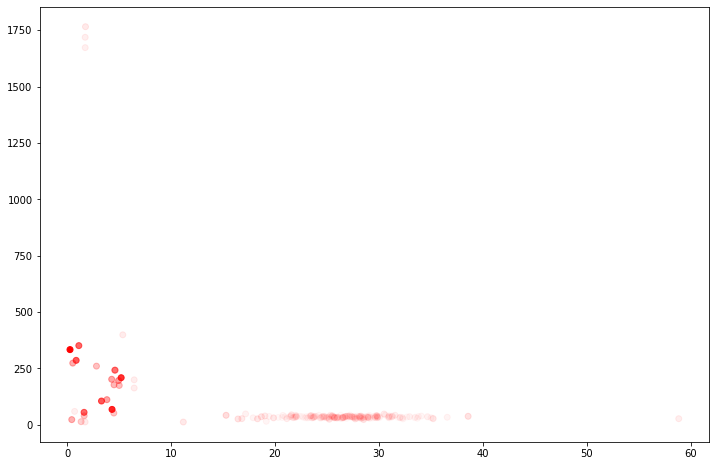

In [7]:
rgba_colors = np.zeros((len(op),4))
# for red the first column needs to be one
rgba_colors[:,0] = 1.0
# the fourth column needs to be your alphas
rgba_colors[:, 3] = op

plt.figure(figsize=(12,8))
plt.scatter(x=x,y=y,color=rgba_colors)